# Metodos Implicito, Explicito y Crank Nicholson

- Mitchell Mirano Caro
- Jhonnatan Williams Torres Condezo


$$u_{t} = u_{xx} - u_{x} +u , 0\leq x \leq 1$$
$$u_{x}(0,t) = 2t, u(1,t) = \frac{t²}{2}, t > 0$$
$$u(x,0) = \sin(x) + \cos(x)$$

## Metodo Explicito

In [195]:
using Plots,Printf, LinearAlgebra

include("src/utils/functions.jl")

crow_method (generic function with 1 method)

In [196]:
a,b = 0,1
t_min, t_max = 0,1

ci = x -> sin.(x) + cos.(x)
cc = t -> t.^2/2


xn = 10
tn  = 1000

h = (b-a)/xn
k = (t_max-t_min)/tn 

0.001

In [197]:

α = 1
λ = k*α^2/h^2

di = fill(λ,xn-1)
d  = fill(1+k+k/h-2*λ,xn)
ds = fill(λ-k/h,xn-1)
A  = Tridiagonal(di, d, ds)
A[1,1] = 1+k+k/h-λ
A

10×10 Tridiagonal{Float64, Vector{Float64}}:
 0.911  0.09    ⋅      ⋅      ⋅      ⋅      ⋅      ⋅      ⋅      ⋅ 
 0.1    0.811  0.09    ⋅      ⋅      ⋅      ⋅      ⋅      ⋅      ⋅ 
  ⋅     0.1    0.811  0.09    ⋅      ⋅      ⋅      ⋅      ⋅      ⋅ 
  ⋅      ⋅     0.1    0.811  0.09    ⋅      ⋅      ⋅      ⋅      ⋅ 
  ⋅      ⋅      ⋅     0.1    0.811  0.09    ⋅      ⋅      ⋅      ⋅ 
  ⋅      ⋅      ⋅      ⋅     0.1    0.811  0.09    ⋅      ⋅      ⋅ 
  ⋅      ⋅      ⋅      ⋅      ⋅     0.1    0.811  0.09    ⋅      ⋅ 
  ⋅      ⋅      ⋅      ⋅      ⋅      ⋅     0.1    0.811  0.09    ⋅ 
  ⋅      ⋅      ⋅      ⋅      ⋅      ⋅      ⋅     0.1    0.811  0.09
  ⋅      ⋅      ⋅      ⋅      ⋅      ⋅      ⋅      ⋅     0.1    0.811

In [198]:
U = zeros(tn+1,xn+1)
U[1,1:xn+1] = ci(LinRange(a, b, xn+1))
U[2:tn+1,xn+1] = cc(LinRange(t_min + k, t_max, tn))
U

1001×11 Matrix{Float64}:
 1.0  1.09484  1.17874  1.25086  …  1.40906  1.41406  1.40494  1.38177
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      5.0e-7
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      2.0e-6
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      4.5e-6
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      8.0e-6
 0.0  0.0      0.0      0.0      …  0.0      0.0      0.0      1.25e-5
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      1.8e-5
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      2.45e-5
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      3.2e-5
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      4.05e-5
 ⋮                               ⋱                             ⋮
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      0.492032
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      0.493024
 0.0  0.0      0.0      0.0         0.0      0.0      0.0     

In [199]:
for j in 2:tn+1
    C = zeros(xn)
    C[1] = -λ*2*h*(t_min + (j-1)*k)
    C[xn] = (k/h^2 -k/h)*U[j,xn+1]
    U[j,1:xn] = A*U[j-1,1:xn] + C
end
U

1001×11 Matrix{Float64}:
  1.0       1.09484    1.17874    1.25086   …  1.41406   1.40494   1.38177
  1.00952   1.094      1.17802    1.25026      1.41416   1.28081   5.0e-7
  1.01809   1.09421    1.17729    1.24967      1.40305   1.18015   2.0e-6
  1.0259    1.09517    1.17668    1.24907      1.38499   1.09741   4.5e-6
  1.03308   1.09667    1.17622    1.24848      1.36278   1.0285    8.0e-6
  1.03973   1.09857    1.17594    1.24791   …  1.33832   0.970392  1.25e-5
  1.04595   1.10075    1.17586    1.24738      1.31285   0.920821  1.8e-5
  1.05179   1.10313    1.17596    1.24691      1.28717   0.878073  2.45e-5
  1.0573    1.10565    1.17624    1.24649      1.26182   0.840837  3.2e-5
  1.06253   1.10827    1.17668    1.24613      1.2371    0.808104  4.05e-5
  ⋮                                         ⋱                      ⋮
 -1.14263  -0.953401  -0.773971  -0.60421      0.157202  0.316948  0.492032
 -1.14661  -0.957129  -0.77741   -0.607309     0.15667   0.317137  0.493024
 -1.15058 

In [200]:
println("x \t\t U(x,t) ")
for (index, value) in enumerate(U[tn+1,:])
    xi =  a + (index-1)*h
    @printf("x_%d = %.2f \t U(%.2f,%.2f) = %.2e \n", index, xi, xi, t_max, value)
end

x 		 U(x,t) 
x_1 = 0.00 	 U(0.00,1.00) = -1.17e+00 
x_2 = 0.10 	 U(0.10,1.00) = -9.83e-01 
x_3 = 0.20 	 U(0.20,1.00) = -8.02e-01 
x_4 = 0.30 	 U(0.30,1.00) = -6.29e-01 
x_5 = 0.40 	 U(0.40,1.00) = -4.65e-01 
x_6 = 0.50 	 U(0.50,1.00) = -3.08e-01 
x_7 = 0.60 	 U(0.60,1.00) = -1.55e-01 
x_8 = 0.70 	 U(0.70,1.00) = -2.90e-03 
x_9 = 0.80 	 U(0.80,1.00) = 1.53e-01 
x_10 = 0.90 	 U(0.90,1.00) = 3.18e-01 
x_11 = 1.00 	 U(1.00,1.00) = 5.00e-01 


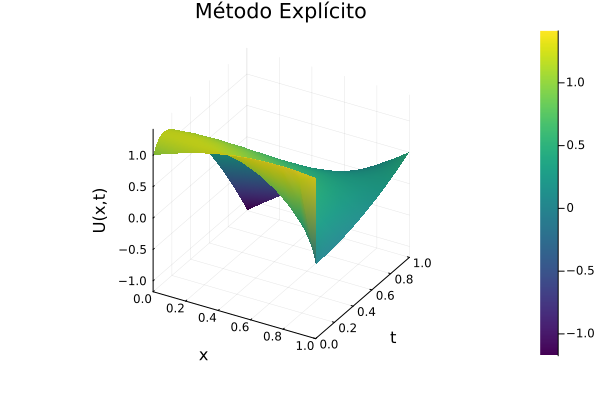

In [201]:
xs = LinRange(a, b, xn+1)
ys = LinRange(t_min, t_max, tn+1)
surface(xs, ys, U, camera=(30,30), c=:viridis, title="Método Explícito",xlabel="x",ylabel="t",zlabel="U(x,t)")

## Método Implicito

In [202]:

α = 1
λ = k*α^2/h^2

di = fill(-(k/h^2 + k/h),xn-1)
d  = fill(1 - k + 2*k/h^2 + k/h,xn)
ds = fill(-k/h^2,xn-1)
A  = Tridiagonal(di, d, ds)
A[1,1] = 1 - k + k/h^2
A[1,2] = k/h^2 + k/h
A

10×10 Tridiagonal{Float64, Vector{Float64}}:
  1.099   0.11     ⋅       ⋅       ⋅     …    ⋅       ⋅       ⋅       ⋅ 
 -0.11    1.209  -0.1      ⋅       ⋅          ⋅       ⋅       ⋅       ⋅ 
   ⋅     -0.11    1.209  -0.1      ⋅          ⋅       ⋅       ⋅       ⋅ 
   ⋅       ⋅     -0.11    1.209  -0.1         ⋅       ⋅       ⋅       ⋅ 
   ⋅       ⋅       ⋅     -0.11    1.209       ⋅       ⋅       ⋅       ⋅ 
   ⋅       ⋅       ⋅       ⋅     -0.11   …  -0.1      ⋅       ⋅       ⋅ 
   ⋅       ⋅       ⋅       ⋅       ⋅         1.209  -0.1      ⋅       ⋅ 
   ⋅       ⋅       ⋅       ⋅       ⋅        -0.11    1.209  -0.1      ⋅ 
   ⋅       ⋅       ⋅       ⋅       ⋅          ⋅     -0.11    1.209  -0.1
   ⋅       ⋅       ⋅       ⋅       ⋅          ⋅       ⋅     -0.11    1.209

In [203]:
U = zeros(tn+1,xn+1)
U[1,1:xn+1] = ci(LinRange(a, b, xn+1))
U[2:tn+1,xn+1] = cc(LinRange(t_min + k, t_max, tn))
U

1001×11 Matrix{Float64}:
 1.0  1.09484  1.17874  1.25086  …  1.40906  1.41406  1.40494  1.38177
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      5.0e-7
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      2.0e-6
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      4.5e-6
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      8.0e-6
 0.0  0.0      0.0      0.0      …  0.0      0.0      0.0      1.25e-5
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      1.8e-5
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      2.45e-5
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      3.2e-5
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      4.05e-5
 ⋮                               ⋱                             ⋮
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      0.492032
 0.0  0.0      0.0      0.0         0.0      0.0      0.0      0.493024
 0.0  0.0      0.0      0.0         0.0      0.0      0.0     

In [204]:
for j in 2:tn+1
    C = zeros(xn)
    C[1] = -(k/h^2 + k/h)*2*h*(t_min + (j-1)*k)
    C[xn] = (-k/h^2)*U[j,xn+1]
    B = C + U[j-1,1:xn]
    U[j,1:xn] = crow_method(A, B)
end
U

1001×11 Matrix{Float64}:
  1.0        1.09484   1.17874   1.25086   …   1.41406    1.40494   1.38177
  0.817146   0.926673  1.15396   1.23738       1.39057    1.27708   5.0e-7
  0.663535   0.798884  1.12167   1.22248       1.36089    1.16888   2.0e-6
  0.533435   0.70204   1.08559   1.20606       1.3273     1.0766    4.5e-6
  0.422349   0.628953  1.04823   1.18827       1.29145    0.997305  8.0e-6
  0.326737   0.57414   1.01123   1.16935   …   1.25452    0.928665  1.25e-5
  0.243795   0.533404  0.975625  1.14957       1.21736    0.868816  1.8e-5
  0.171295   0.503526  0.942018  1.12922       1.18053    0.816267  2.45e-5
  0.107457   0.482034  0.910735  1.10857       1.14443    0.769815  3.2e-5
  0.0508519  0.467023  0.881903  1.08784       1.10933    0.72849   4.05e-5
  ⋮                                        ⋱                        ⋮
 -1.67669    1.32815   0.94686   0.661743     -0.148473  -0.303309  0.492032
 -1.67862    1.32969   0.947956  0.662496     -0.148866  -0.303969  0.4930

In [205]:
println("x \t\t U(x,t) ")
for (index, value) in enumerate(U[tn+1,:])
    xi =  a + (index-1)*h
    @printf("x_%d = %.2f \t U(%.2f,%.2f) = %.2e \n", index, xi, xi, t_max, value)
end

x 		 U(x,t) 
x_1 = 0.00 	 U(0.00,1.00) = -1.69e+00 
x_2 = 0.10 	 U(0.10,1.00) = 1.34e+00 
x_3 = 0.20 	 U(0.20,1.00) = 9.56e-01 
x_4 = 0.30 	 U(0.30,1.00) = 6.68e-01 
x_5 = 0.40 	 U(0.40,1.00) = 4.48e-01 
x_6 = 0.50 	 U(0.50,1.00) = 2.72e-01 
x_7 = 0.60 	 U(0.60,1.00) = 1.24e-01 
x_8 = 0.70 	 U(0.70,1.00) = -1.23e-02 
x_9 = 0.80 	 U(0.80,1.00) = -1.52e-01 
x_10 = 0.90 	 U(0.90,1.00) = -3.09e-01 
x_11 = 1.00 	 U(1.00,1.00) = 5.00e-01 


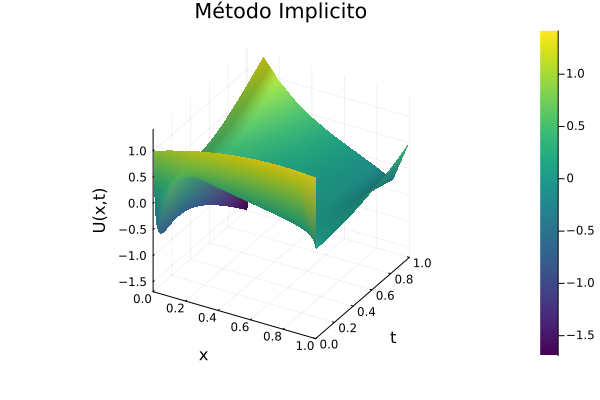

In [206]:
xs = LinRange(a, b, xn+1)
ys = LinRange(t_min, t_max, tn+1)
surface(xs, ys, U, camera=(30,30), c=:viridis, title="Método Implicito",xlabel="x",ylabel="t",zlabel="U(x,t)")